# IMPORTS

In [3]:
# === Fix de importación desde notebooks/ ===
import sys
from pathlib import Path

CWD = Path.cwd().resolve()
# Si estás dentro de /notebooks, sube a la raíz del proyecto
PROJECT_ROOT = CWD if (CWD / "src").exists() else CWD.parent
SRC = PROJECT_ROOT / "src"

if str(SRC) not in sys.path:
    sys.path.insert(0, str(SRC))
    print("✅ Añadido a sys.path:", SRC)

# Opcional: diagnóstico
import os
print("📁 CWD:", CWD)
print("📁 PROJECT_ROOT:", PROJECT_ROOT)
print("📁 Contenido de src:", list((SRC).glob("*")))

# Ahora los imports SIN 'src.'
from toolkit_bursatil.core.price_series import PriceSeries
from toolkit_bursatil.core.portfolio import Portfolio
from toolkit_bursatil.data.provider_yahoo import YahooSerie
from toolkit_bursatil.data.provider_alpha import AlphaVantageSerie
from toolkit_bursatil.core.montecarlo import MonteCarloSimulacion

print("✅ Imports OK")


📁 CWD: C:\Users\diego\MIAX\01-toolkit-analisis-bursatil
📁 PROJECT_ROOT: C:\Users\diego\MIAX\01-toolkit-analisis-bursatil
📁 Contenido de src: [WindowsPath('C:/Users/diego/MIAX/01-toolkit-analisis-bursatil/src/tests'), WindowsPath('C:/Users/diego/MIAX/01-toolkit-analisis-bursatil/src/toolkit_bursatil')]
✅ Imports OK


In [4]:
# ================================================================
# 📦 NOTEBOOK SETUP — Proyecto: 01-toolkit-analisis-bursatil
# ---------------------------------------------------------------
# Prepara el entorno del notebook para:
#  1️⃣ Recargar automáticamente los módulos .py al guardarlos.
#  2️⃣ Añadir la carpeta src/ al sys.path (un nivel arriba del notebook).
# ================================================================

# --- Autoreload ---
%load_ext autoreload
%autoreload 2

# --- Paths del proyecto ---
import os, sys

# 1️⃣ Detectar ruta actual (notebooks/)
current_dir = os.getcwd()

# 2️⃣ Subir un nivel (raíz del proyecto)
project_root = os.path.abspath(os.path.join(current_dir, ".."))

# 3️⃣ Construir ruta al src/
src_path = os.path.join(project_root, "src")

# 4️⃣ Añadir al sys.path si no está
if src_path not in sys.path:
    sys.path.append(src_path)
    print(f"✅ src añadido al sys.path: {src_path}")
else:
    print("ℹ️ src ya estaba en el sys.path")

# --- Imports base ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

# --- Imports del proyecto ---
from toolkit_bursatil.core.price_series import PriceSeries
from toolkit_bursatil.core.portfolio import Portfolio
from toolkit_bursatil.data.provider_yahoo import YahooSerie

print("✅ Entorno listo. Autoreload activo y módulos disponibles.")



✅ src añadido al sys.path: c:\Users\diego\MIAX\src
✅ Entorno listo. Autoreload activo y módulos disponibles.


# YFINANCE

## PriceSeries

In [3]:
df = yf.download("AAPL", start="2023-01-01", end="2024-12-31")

C:\Users\diego\AppData\Local\Temp\ipykernel_19292\1920030322.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("AAPL", start="2023-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


In [10]:
type(df)

pandas.core.frame.DataFrame

In [5]:
print("Tipo de columnas:", type(df.columns))
print("Número de niveles:", getattr(df.columns, 'nlevels', 1))
print("Columnas completas:")
print(df.columns)
# Quedarse con la columna Price

NameError: name 'df' is not defined

In [6]:
serie = PriceSeries(ticker="AAPL", data=df)

NameError: name 'df' is not defined

═════════════════════════════════════════════
 Ticker: AAPL
 Fechas: 2023-01-03 → 2024-12-30
 Media diaria: 0.001515
 Desv. típica diaria: 0.013460
═════════════════════════════════════════════


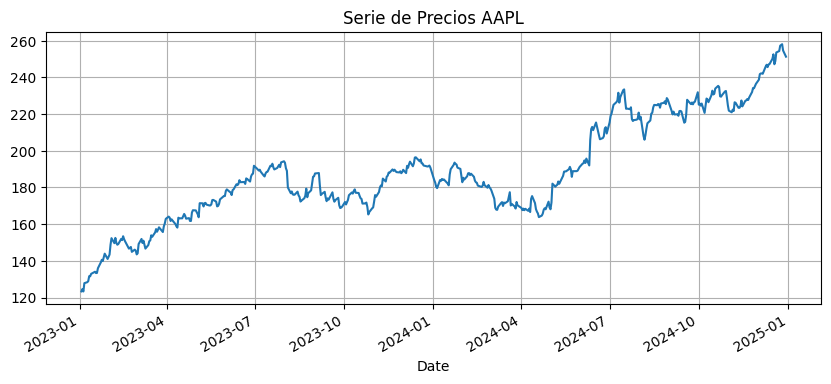

In [ ]:
serie.info()
serie.plots_report(column="close", title="Serie de Precios AAPL")


<Axes: title={'center': 'Retornos AAPL'}, xlabel='Date'>

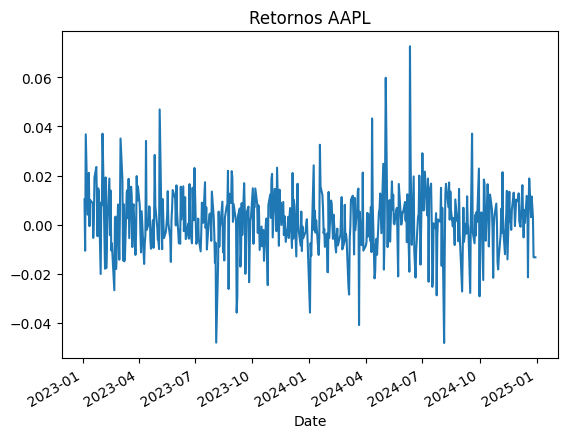

In [ ]:
serie.returns().plot(title="Retornos AAPL")

## Portfolio

In [6]:
# --- Imports adicionales ---

# --- Descargar datos de múltiples activos ---
tickers = ["ASML", "GOOGL"]
data_dict = {}

for ticker in tickers:
    df = yf.download(ticker, start="2023-01-01", end="2024-12-31", progress=False)
    data_dict[ticker] = PriceSeries(ticker=ticker, data=df)

# --- Crear Portfolio con pesos iguales ---
weights = {ticker: 1/len(tickers) for ticker in tickers}
print("Pesos del portfolio:", weights)

portfolio = Portfolio(
    name="Tech Portfolio",
    assets=data_dict,
    weights=weights
)

# --- Mostrar estadísticas ---
print(f"\n📊 Estadísticas del Portfolio: {portfolio.name}")
print(f"Media de retornos: {portfolio.mean:.6f}")
print(f"Desviación estándar de retornos: {portfolio.std:.6f}")
print(f"\nPrimeros retornos de la cartera:")
print(portfolio.portfolio_returns.head())

# --- Graficar retornos acumulados ---
portfolio.plot_returns()

C:\Users\diego\AppData\Local\Temp\ipykernel_19292\4052909796.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2023-01-01", end="2024-12-31", progress=False)


AttributeError: 'tuple' object has no attribute 'lower'

## YahooSerie

123
Columnas estandarizadas: Index(['close', 'high', 'low', 'open', 'volume'], dtype='object')


C:\Users\diego\MIAX\01-toolkit-analisis-bursatil\src\toolkit_bursatil\data\provider_yahoo.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


<Axes: title={'center': 'Retornos AAPL - Yahoo Finance'}, xlabel='Date'>

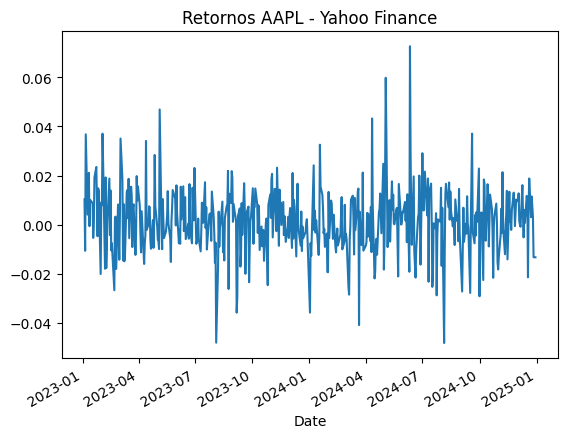

In [16]:
serie_yahoo = YahooSerie(ticker="AAPL", start_date="2023-01-01", end_date="2024-12-31")
serie = serie_yahoo.get_serie_precios()
serie.returns().plot(title="Retornos AAPL - Yahoo Finance")

═════════════════════════════════════════════
 Ticker: AAPL
 Fechas: 2023-01-03 → 2024-12-30
 Media diaria: 0.001515
 Desv. típica diaria: 0.013460
═════════════════════════════════════════════


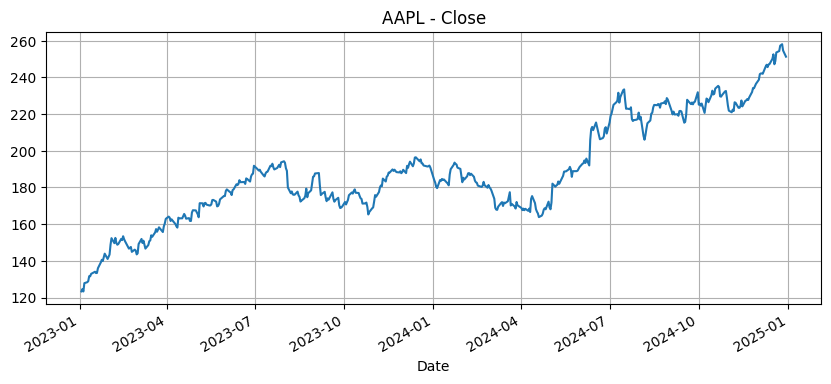

In [17]:
serie.info()
serie.plots_report()

# ALPHA VANTAGE

## AlphaVantageSerie

Columnas estandarizadas: Index(['open', 'high', 'low', 'close', 'volume'], dtype='object')


<Axes: title={'center': 'Retornos AAPL - Yahoo Finance'}, xlabel='date'>

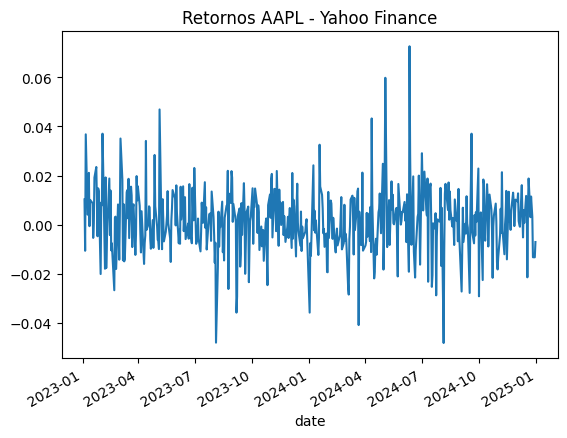

In [3]:
serie_alpha = AlphaVantageSerie(ticker="AAPL", start_date="2023-01-01", end_date="2024-12-31")
serie = serie_alpha.get_serie_precios()
serie.returns().plot(title="Retornos AAPL - Yahoo Finance")

# MONTE CARLO

In [5]:
serie_yahoo = YahooSerie(ticker="AAPL", start_date="2023-01-01", end_date="2024-12-31")


In [8]:
serie_yahoo.get_serie_precios()

C:\Users\diego\MIAX\01-toolkit-analisis-bursatil\src\toolkit_bursatil\data\provider_yahoo.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  import pandas as pd


PriceSeries(ticker='AAPL', data=                 close        high         low        open     volume
Date                                                                 
2023-01-03  123.330635  129.079551  122.443150  128.468178  112117500
2023-01-04  124.602699  126.870716  123.340502  125.125327   89113600
2023-01-05  123.281342  125.993097  123.024963  125.361998   80962700
2023-01-06  127.817352  128.478033  123.153137  124.257564   87754700
2023-01-09  128.339981  131.554653  128.083602  128.655538   70790800
...                ...         ...         ...         ...        ...
2024-12-23  254.367004  254.745650  252.553435  253.868773   40858800
2024-12-24  257.286682  257.296626  254.386957  254.586262   23234700
2024-12-26  258.103729  259.179926  256.718662  257.276679   27237100
2024-12-27  254.685867  257.784882  252.164818  256.917934   42355300
2024-12-30  251.307877  252.603281  249.863009  251.337769   35557500

[501 rows x 5 columns], mean=0.00151473525058471, std=0.0

C:\Users\diego\MIAX\01-toolkit-analisis-bursatil\src\toolkit_bursatil\data\provider_yahoo.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(self.ticker, start=self.start_date, end=self.end_date, progress=False)


═════════════════════════════════════════════
  Resultados Simulación Monte Carlo
 Media final: 375.07
 P5: 251.79
 P95: 520.94
═════════════════════════════════════════════


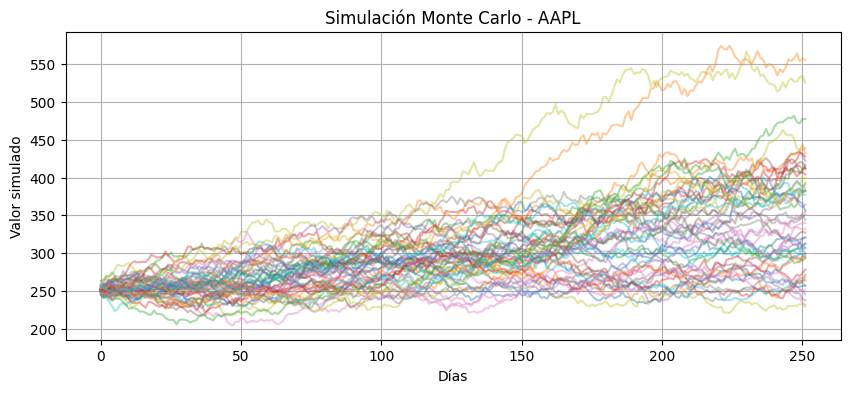

In [6]:
serie = serie_yahoo.get_serie_precios()

sim = MonteCarloSimulacion(objeto=serie, n_sim=500, horizonte=252, valor_inicial=serie.data["close"].iloc[-1])
sim.ejecutar()
sim.resumen()
sim.graficar()